In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.datasets import load_iris
import os

from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
ad_data = pd.read_csv('All-India-Rainfall-Act_Dep_1901_to_2019_0.csv')

In [3]:
ad_data.head()

,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,1901,111.0,243.2,273.6,124.6,752.4
1,1902,109.0,282.8,201.8,201.0,794.7
2,1903,117.0,292.0,271.7,200.9,881.7
3,1904,165.2,263.1,205.2,131.7,765.2
4,1905,92.3,254.9,201.4,180.0,728.6


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     119 non-null    int64  
 1   JUN      119 non-null    float64
 2   JUL      119 non-null    float64
 3   AUG      119 non-null    float64
 4   SEP      119 non-null    float64
 5   JUN-SEP  119 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.7 KB


In [5]:
ad_data.describe()

,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1960.000000,167.252941,291.192437,258.613445,173.120168,890.191597
std,34.496377,35.450870,39.713325,34.787985,36.899645,86.652632
min,1901.000000,87.900000,140.300000,192.500000,96.600000,682.100000
25%,1930.500000,142.950000,268.900000,233.800000,144.950000,822.350000
50%,1960.000000,165.200000,294.100000,258.700000,172.600000,901.000000
75%,1989.500000,190.850000,317.600000,287.700000,199.450000,955.300000
max,2019.000000,274.600000,376.300000,336.100000,282.500000,1098.400000


In [6]:
ad_data.isna().sum()

YEAR       0
JUN        0
JUL        0
AUG        0
SEP        0
JUN-SEP    0
dtype: int64

In [7]:
ad_data.columns = ['Year','Jun','Jul','Aug','Sep','Jun_sep']

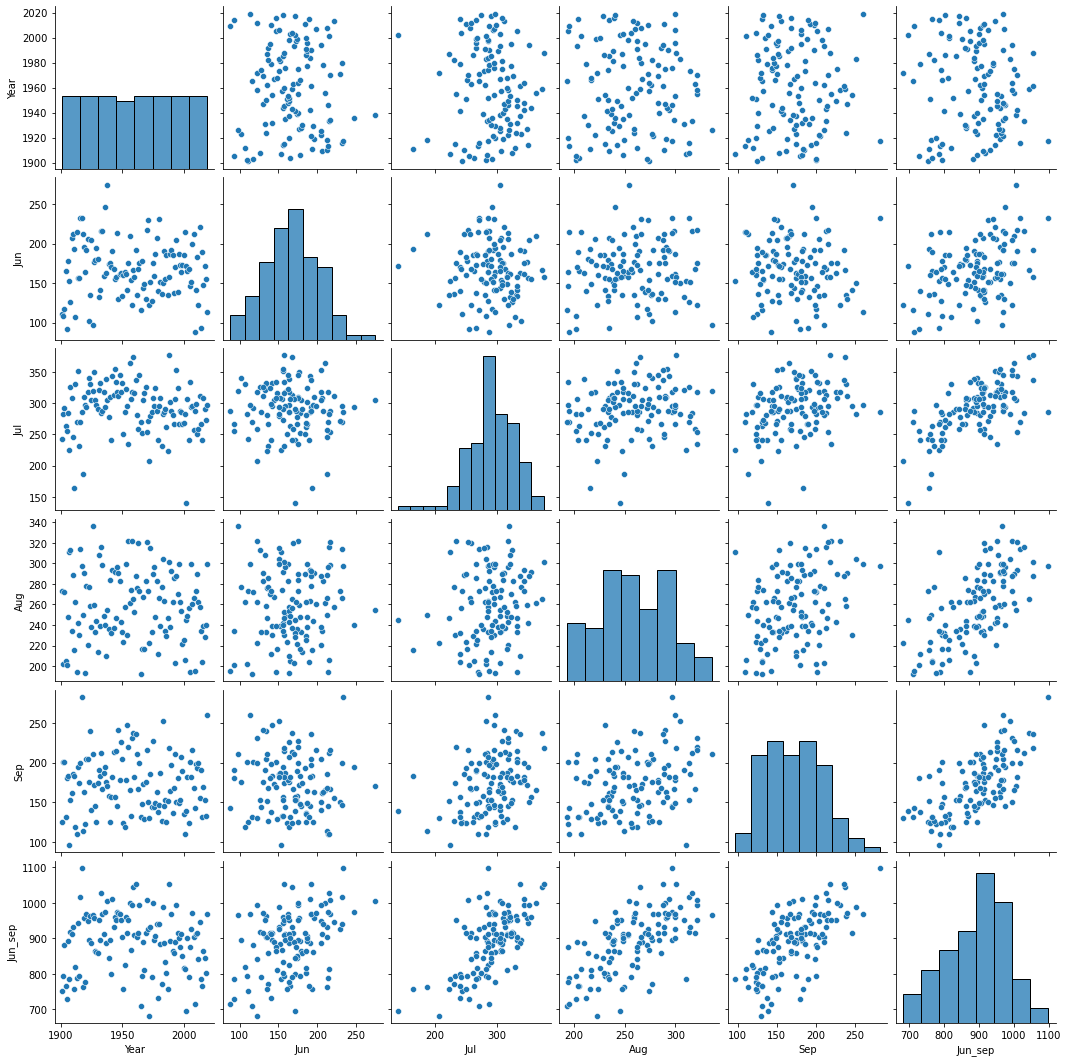

In [8]:
p = sns.pairplot(ad_data)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


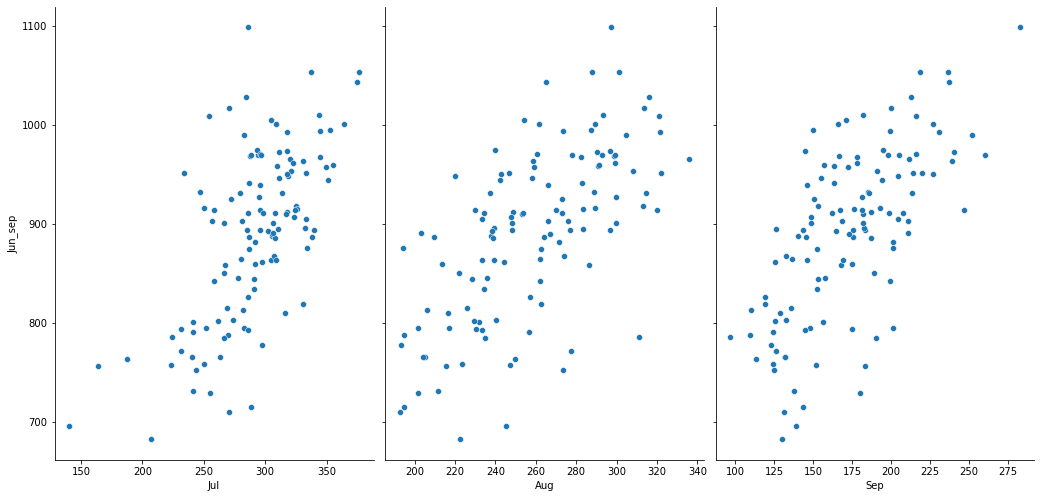

In [9]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['Jul','Aug','Sep'], y_vars='Jun_sep', size=7, aspect=0.7)

In [10]:
# Fitting the linear model
x = ad_data.drop(["Jun_sep"],axis=1)
y = ad_data.Jun_sep

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.30)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [14]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9999994688522881


In [15]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
# Very close to zero so all good here.

Mean of Residuals 7.122548869306065e-14


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


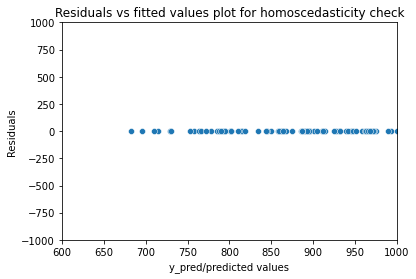

In [16]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1000,1000)
plt.xlim(600,1000)
p = sns.lineplot([0,100],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [17]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 2.0688700220052527), ('p-value', 0.015280735055037756)]

In [18]:
from scipy.stats import bartlett
test = bartlett(X_train[0],residuals)
print(test)

BartlettResult(statistic=230.63339521952608, pvalue=4.337210086045197e-52)


In [19]:
from scipy.stats import bartlett
test = bartlett(X_train[1],residuals)
print(test)

BartlettResult(statistic=132.75562040390673, pvalue=1.0225509584437722e-30)


In [20]:
from scipy.stats import bartlett
test = bartlett(X_train[2],residuals)
print(test)

BartlettResult(statistic=229.1848221110424, pvalue=8.976781029500712e-52)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


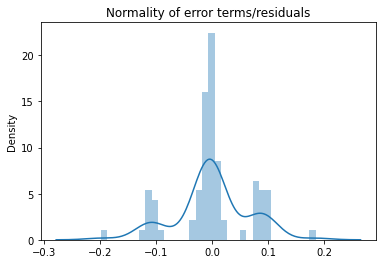

In [21]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


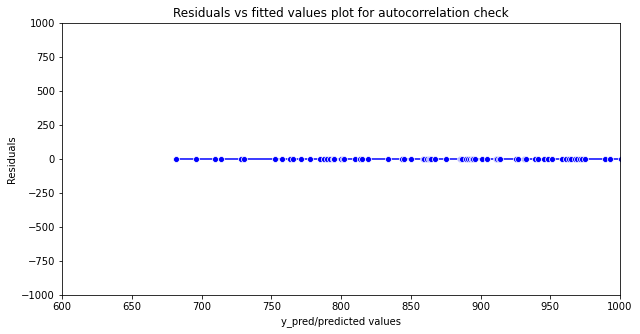

In [22]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1000,1000)
plt.xlim(600,1000)
p = sns.lineplot([0,100],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [23]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])
#Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.017890018001654746

In [24]:
import statsmodels.api as sm

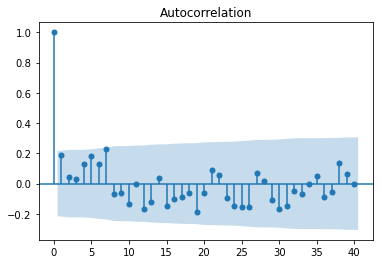

In [25]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

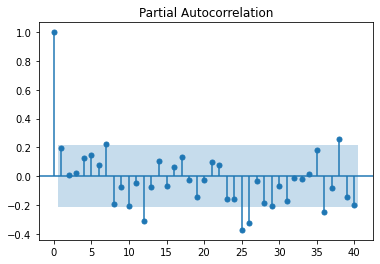

In [26]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

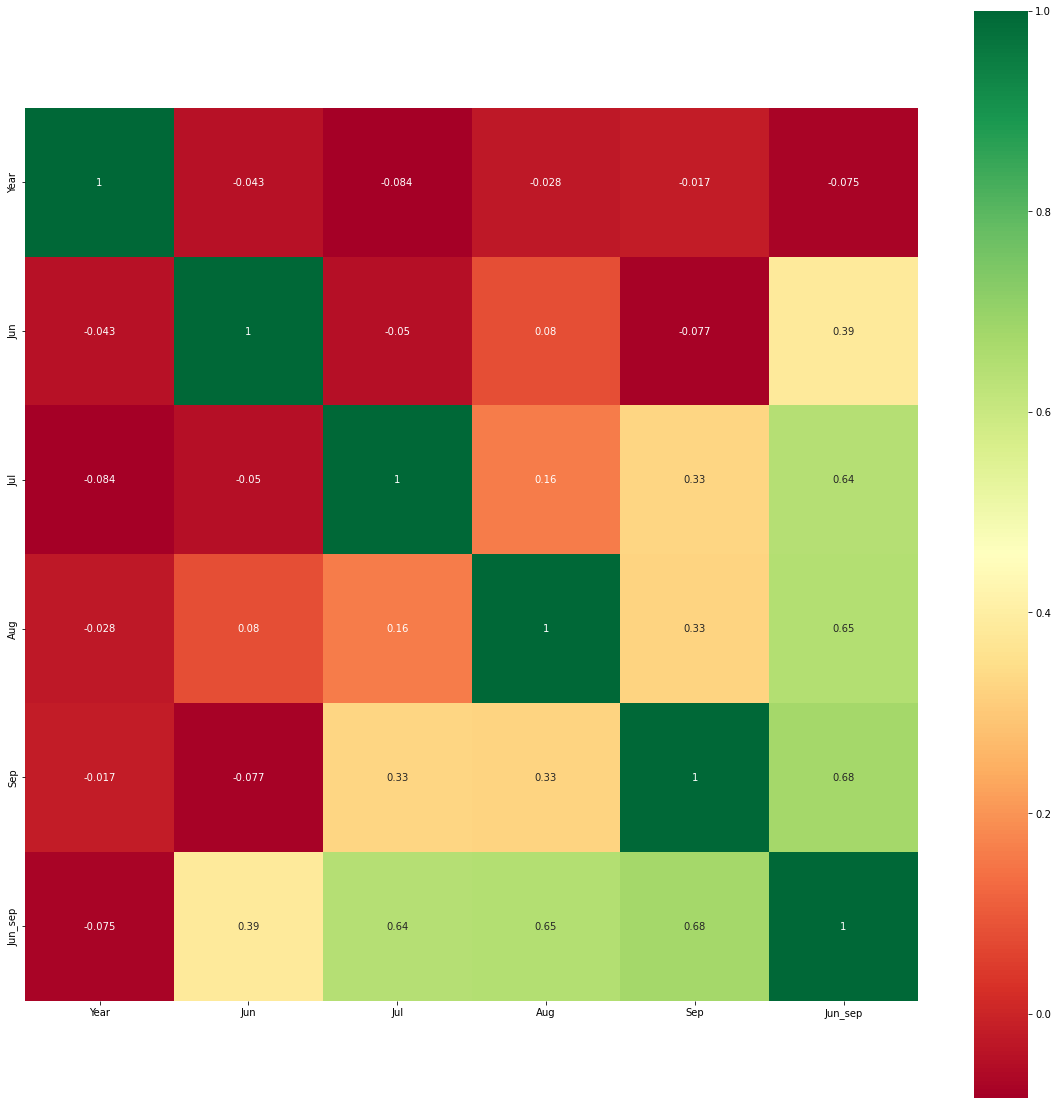

In [27]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [28]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [29]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9787214254102642
R squared: 0.9787214254102642


In [30]:
# SVM

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_train)
print("Accuracy: {}".format(svr.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

Accuracy: 0.11189368184869908
R squared: 0.11189368184869908
